$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Im}{\mathbf{I}}
  \newcommand{\Ym}{\mathbf{Y}}
$
### ITCS 8010: Machine Learning with Graphs and Large Networks (Fall 2020)

# Problem Set X

The purpose of these exercises is getting used to with the RMAT graph using the network analysis tool (i.e. `NetworkX` software). I generate the RMAT graph using PaRMAT [[3]](https://github.com/biqar/PaRMAT).

Here is the software packages I used in this assignment:
* Python 3.7.6
* NetworkX 2.5
* Numpy
* todo ...

## 1. Analyzing the RMAT Graph

todo: description of RMAT graph

* Directed graph (each unordered pair of nodes is saved once): XXXX.txt 
* Nodes: 1M; Edges: 16M
* Flags:
    * -nVertices 1000000
    * -nEdges 16000000
    * -sorted
    * -noDuplicateEdges
    * -noEdgeToSelf
    * -undirected
    * -threads 32

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import collections as collec
%matplotlib inline

Reading `RMAT` graph.

In [2]:
G_rmat = nx.read_edgelist("data/rmat_100K_1600K_def.txt", nodetype=int, comments='#', create_using=nx.DiGraph)

1. The number of nodes in the network

In [3]:
nx.number_of_nodes(G_rmat)

94572

2. The number of nodes with a self-edge (self-loop), i.e., the number of nodes a ∈ V where (a, a) ∈ E.

In [4]:
len(list(nx.nodes_with_selfloops(G_rmat)))

0

3. The number of directed edges in the network, i.e., the number of ordered pairs (a,b) ∈ E for which a!=b.

In [5]:
num_edges = nx.number_of_edges(G_rmat)
self_loops = len(list(nx.nodes_with_selfloops(G_rmat)))
num_dir_edges = num_edges - self_loops
print(num_dir_edges)

1599999


4. The number of undirected edges in the network, i.e., the number of unique unordered pairs (a,b), a!=b, for which (a,b) ∈ E or (b, a) ∈ E (or both). If both (a, b) and (b, a) are edges, this counts a single undirected edge.

In [6]:
nx.number_of_edges(G_rmat.to_undirected(True))
#G_rmat.to_undirected(True).size()

0

5. The number of reciprocated edges in the network, i.e., the number of unique unordered pairs of nodes (a,b), a!=b, for which (a,b) ∈ E and (b,a) ∈ E.

In [9]:
nx.reciprocity(G_rmat)
#nx.overall_reciprocity(G_rmat)

In [63]:
num_edges = nx.number_of_edges(G_rmat)
num_edges_undir = nx.number_of_edges(G_rmat.to_undirected(True))

num_edges_recip = num_edges - num_edges_undir
print(num_edges_recip)

100762


## 2. Further Analyzing the RMAT Graph

1. Plot the distribution of out-degrees of nodes in the network on a log-log scale.

Text(0, 0.5, 'Frequency')

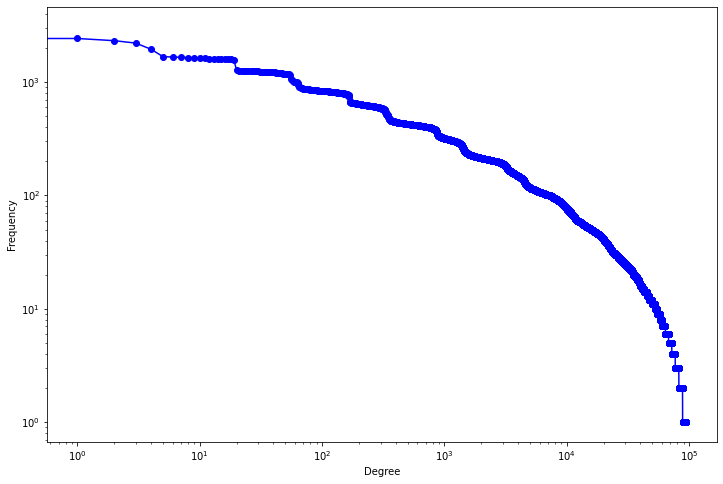

In [7]:
G_rmat_undir = G_rmat.to_undirected()
out_degree_freq = sorted([d for n, d in G_rmat_undir.degree()], reverse=True)
degrees = range(len(out_degree_freq))
plt.figure(figsize=(12, 8))
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')

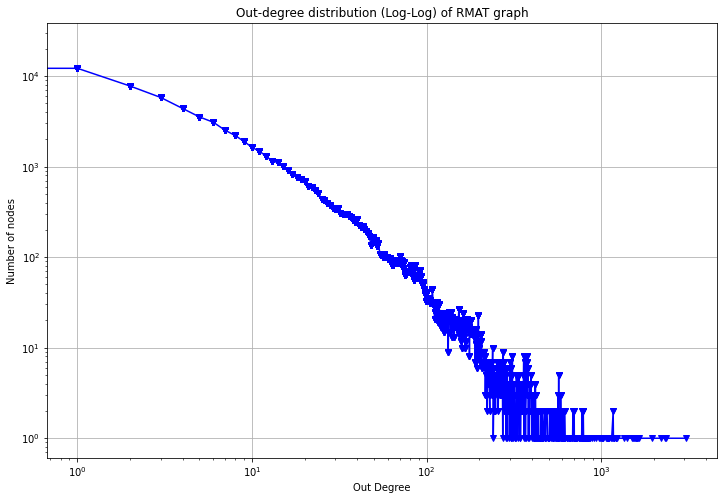

In [8]:
# Calculate in degrees of a directed graph
# in_degrees = G_rmat.in_degree() # dictionary node:degree
# in_values = sorted([d for n, d in in_degrees])
# in_hist = [in_values.count(x) for x in in_values]

# Calculate out degrees of a directed graph
out_degrees = G_rmat.out_degree() # dictionary node:degree
out_values = sorted([d for n, d in out_degrees])
out_hist = [out_values.count(x) for x in out_values]

# regular ploting the degree distribution
# plt.figure(figsize=(12, 8))
# plt.grid(True)
# plt.plot(in_values, in_hist, 'ro-') # in-degree
# plt.plot(out_values, out_hist, 'bv-') # out-degree
# plt.legend(['In-degree', 'Out-degree'])
# plt.xlabel('Degree')
# plt.ylabel('Number of nodes')
# plt.title('Degree distribution of RMAT graph')
# plt.show()

# log-log ploting the degree distribution
# plt.figure(figsize=(12, 8))
# plt.grid(True)
# plt.loglog(in_values, in_hist, 'ro-') # in-degree
# plt.loglog(out_values, out_hist, 'bv-') # out-degree
# plt.legend(['In-degree', 'Out-degree'])
# plt.xlabel('Degree')
# plt.ylabel('Number of nodes')
# plt.title('Degree distribution (Log-Log) of RMAT graph')
# plt.show()

# log-log ploting the out-degree distribution
plt.figure(figsize=(12, 8))
plt.grid(True)
plt.loglog(out_values, out_hist, 'bv-') # out-degree
plt.xlabel('Out Degree')
plt.ylabel('Number of nodes')
plt.title('Out-degree distribution (Log-Log) of RMAT graph')
plt.show()

# References


[1] Erdős, Paul, and Alfréd Rényi. 1960. “On the Evolution of Random Graphs.” Bull. Inst. Internat. Statis. 38 (4): 343–47.

[2] NetworkX, “Software for Complex Networks,” https://networkx.github.io/documentation/stable/, 2020, accessed: 2020-10.

[3] PaRMAT, “Multi-threaded Large-Scale RMAT Graph Generator,” https://github.com/biqar/PaRMAT, 2020, accessed: 2020-10.